In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group
import seaborn as sns
import pandas as pd

# Goal 
To generate data (6 distinct groups) with trajectory in time

data_structure = [[n_1 data], [n_2 data]]

In [3]:
# c = number of class
# t = timepoints
# d = dimention of data
# a = amplitude

c = 6 
t = 1000
d = 2
to_d = 10
a = 1

In [4]:
theta = np.linspace(0, 2*np.pi, c+1)
theta = theta[:-1]
theta


array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776])

In [5]:
def find_coords(theta, class_num):
    x = a * np.cos(theta[class_num])
    y = a * np.sin(theta[class_num])
    return [x, y]

def transformation_to_n_dim(data, from_d, to_d):
    new_data = np.zeros((data.shape[0], to_d, data.shape[2]))

    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            # print(data[i, :, j].shape)
            new_data[i, :, j] = np.hstack((data[i, :, j], np.zeros(to_d - from_d)))
    
    return new_data

random_rotation_matrix = special_ortho_group.rvs(to_d, random_state=42)

def rotation(data, seed = 42, d = to_d, random_rotation_matrix = random_rotation_matrix):
    random_rotated = np.zeros((data.shape[0], to_d, data.shape[2]))
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            random_rotated[i, :, j] = np.matmul(data[i, :, j], random_rotation_matrix)

    return random_rotated

In [6]:
data = np.zeros((c, d, t))

In [7]:
# Initial location
for i in range(c):
    data[i, :, 0] = find_coords(theta, i)
    print(find_coords(theta, i))    

[np.float64(1.0), np.float64(0.0)]
[np.float64(0.5000000000000001), np.float64(0.8660254037844386)]
[np.float64(-0.49999999999999983), np.float64(0.8660254037844387)]
[np.float64(-1.0), np.float64(1.2246467991473532e-16)]
[np.float64(-0.5000000000000004), np.float64(-0.8660254037844384)]
[np.float64(0.49999999999999933), np.float64(-0.866025403784439)]


In [8]:
for i in range(t):
    if i == 0:
        continue
    data[:, :, i] = data[:, :, i - 1] * 1.002 + np.random.normal(0, 0.01, (c, d))

Text(0.5, 0, 'Time')

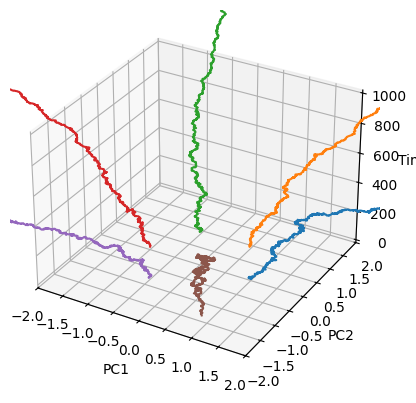

In [9]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(data[i, 0, :], data[i, 1, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')



In [10]:
print(data[0, :, 0])

[1. 0.]


In [11]:
new_data = transformation_to_n_dim(data, d, to_d)
new_data.shape

(6, 10, 1000)

In [12]:
new_data[0, :, 2]

array([ 0.98948651, -0.00997255,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [13]:
rotated = rotation(new_data)

In [14]:
rotated.shape

(6, 10, 1000)

In [15]:
rotated[0, :, 2]

array([-0.18917425,  0.1632522 ,  0.23270726,  0.20733657,  0.48865676,
       -0.21600599,  0.14904332, -0.28945778, -0.10147392, -0.64642324])

Text(0.5, 0, 'Time')

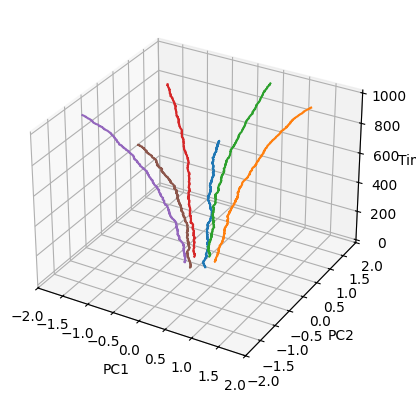

In [16]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(rotated[i, 1, :], rotated[i, 8, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')


Text(0.5, 0, 'Time')

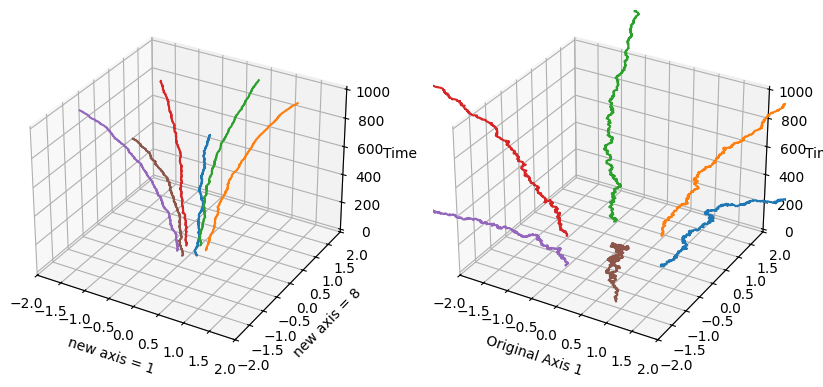

In [17]:
rotated_axis_a = 1
rotated_axis_b = 8

fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

# ax[0] = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax[0].plot(rotated[i, rotated_axis_a, :], rotated[i, rotated_axis_b, :], range(t))

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('new axis = ' + str(rotated_axis_a))
ax[0].set_ylabel('new axis = ' + str(rotated_axis_b))
ax[0].set_zlabel('Time')

# ax[1] = plt.figure().add_subplot(projection='3d')
for i in range(c):
    ax[1].plot(data[i, 0, :], data[i, 1, :], range(t))

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original Axis 1')
ax[1].set_zlabel('Time')


Text(0.5, 0, 'Original axis 1-2')

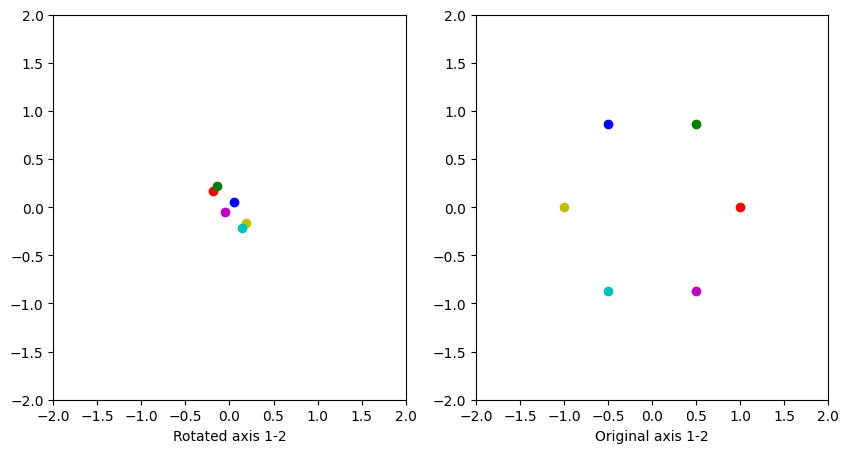

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
color = ['r', 'g', 'b', 'y', 'c', 'm']

for i in range(c):
    ax[0].scatter(rotated[i, 0, 0], rotated[i, 1, 0], color = color[i])
    ax[1].scatter(data[i, 0, 0], data[i, 1, 0], color = color[i])

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('Rotated axis 1-2')

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original axis 1-2')

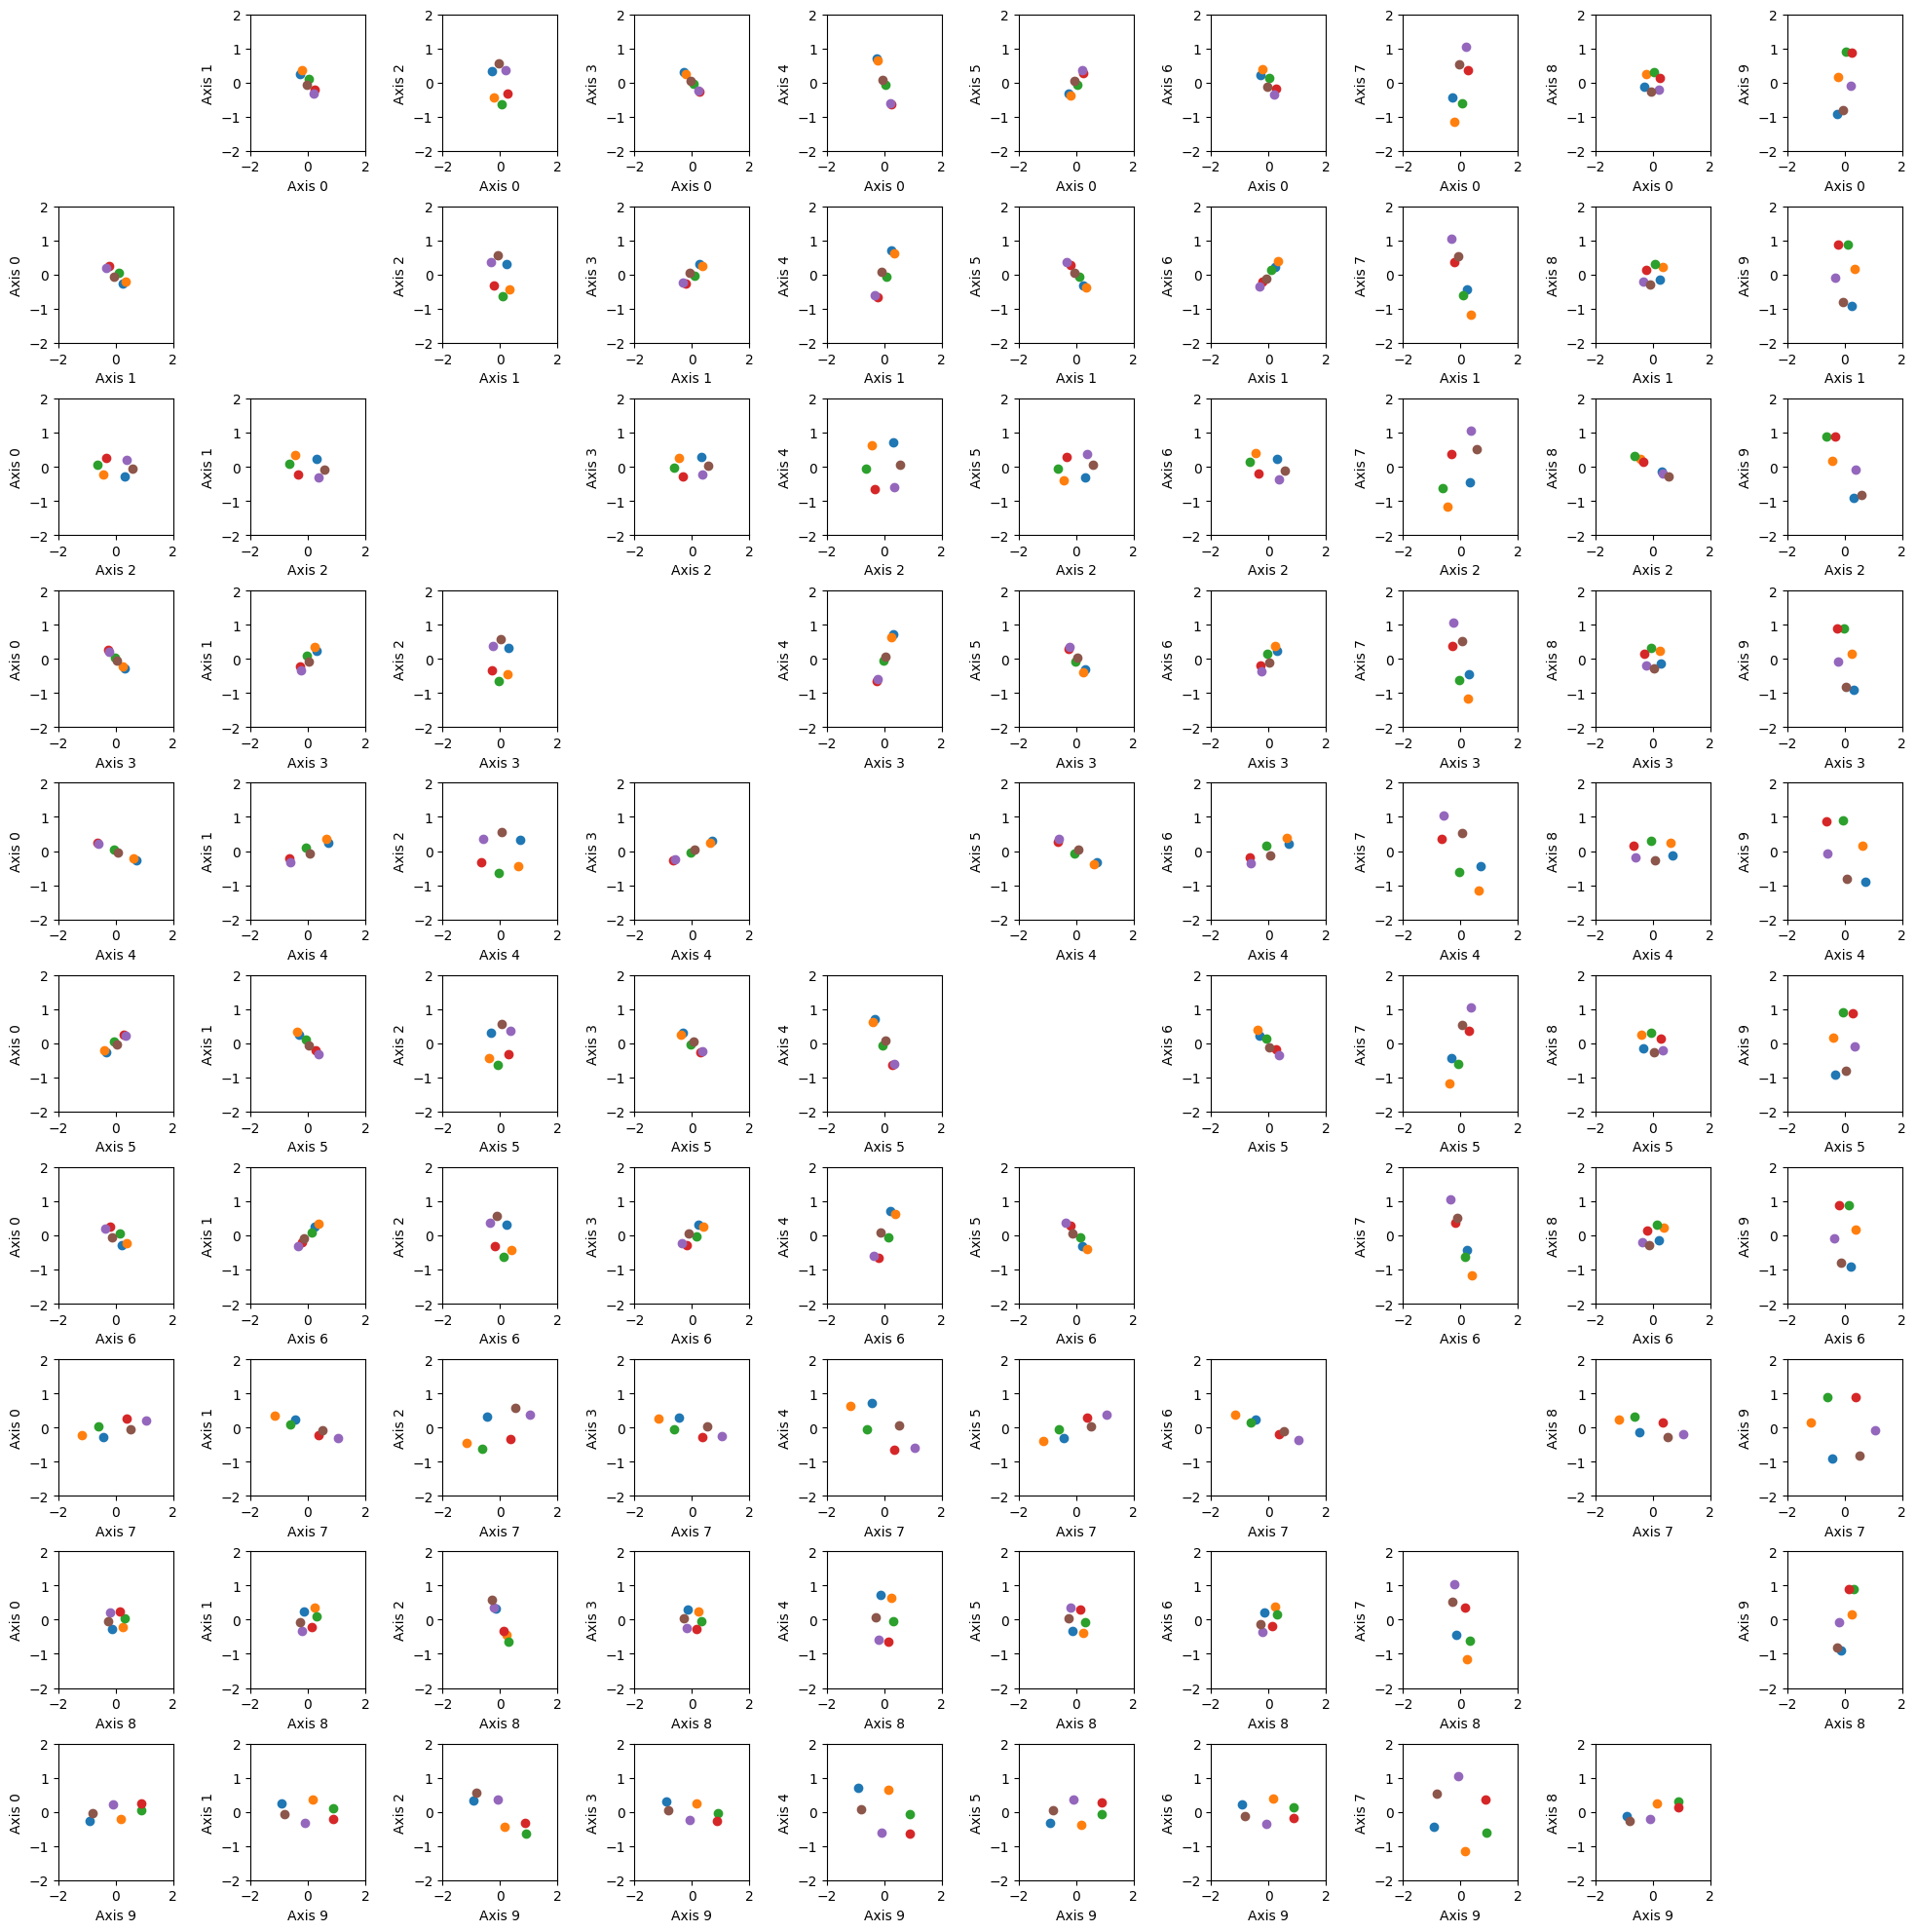

In [19]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
fig.tight_layout(pad=2.0)

inspect_time = 200

for i in range(10):
    for j in range(10):
        for k in range(6):
            if i != j:
                ax[i, j].scatter(rotated[k, i, inspect_time], rotated[k, j, inspect_time])
                ax[i, j].set_xlim([-2, 2])
                ax[i, j].set_ylim([-2, 2])
                ax[i, j].set_xlabel(f'Axis {i}')
                ax[i, j].set_ylabel(f'Axis {j}')
            else:
                ax[i, j].axis('off')  # Turn off the diagonal subplots

plt.show()

In [20]:
np.save('explode-rotated.npy', rotated)

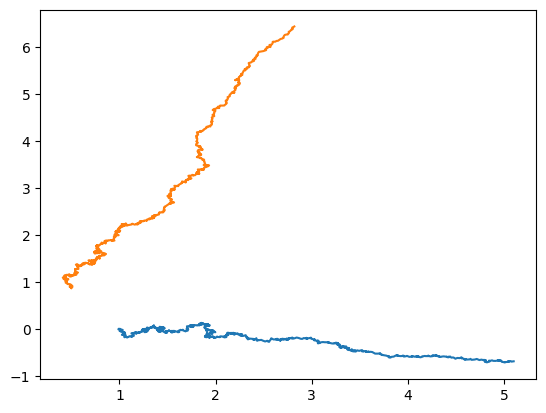

In [21]:
for i in range(2):
    plt.plot(data[i, 0, :], data[i, 1, :])

In [22]:
def generate_data(c, t, d, to_d, a, theta):
    data = np.zeros((c, d, t))

    # Initial location
    for i in range(c):
        data[i, :, 0] = find_coords(theta, i)
        # print(find_coords(theta, i))    
    
    for i in range(t):
        if i == 0:
            continue
        data[:, :, i] = data[:, :, i - 1] * 1.002 + np.random.normal(0, 0.01, (c, d))
    
    data = transformation_to_n_dim(data, d, to_d)

    rotated = rotation(data)

    return rotated
    

In [23]:
from sklearn.decomposition import PCA
data_train = []
data_test = []

(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)


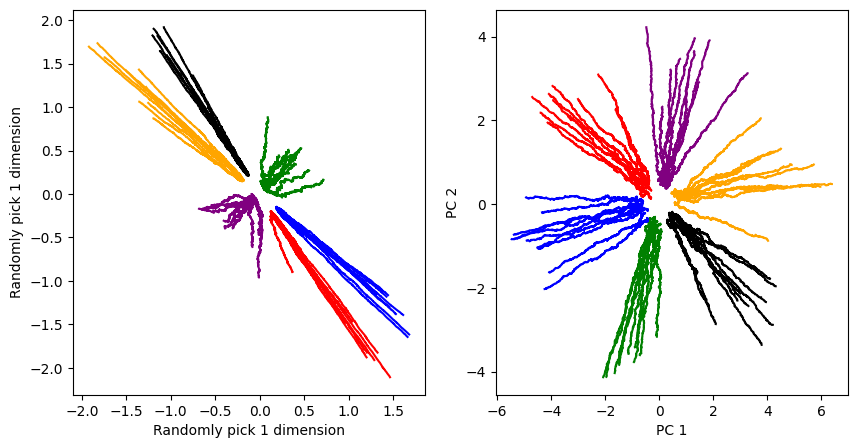

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
def generate_to_plot_PCA():
    gen_data = generate_data(c, t, d, to_d, a, theta)
    average = np.zeros((c, to_d))

    color = ['orange', 'black', 'green', 'blue', 'red', 'purple']
    pca = PCA(n_components=5)


    all_data = np.hstack((gen_data[0, :5, :], gen_data[1, :5, :], gen_data[2, :5, :], gen_data[3, :5, :], gen_data[4, :5, :], gen_data[5, :5, :]))
    print(all_data.shape)

    for i in range(c):
        recovered_data = pca.fit_transform(all_data.T).T
        print(recovered_data.shape)
        ax[0].plot(gen_data[i, 0, :], gen_data[i, 1, :], color = color[i])
        ax[0].set_xlabel('Randomly pick 1 dimension')
        ax[0].set_ylabel('Randomly pick 1 dimension')

    for i in range(c):
        epoch_data = gen_data.shape[2]

        ax[1].plot(recovered_data[0, i*epoch_data:(i+1)*(epoch_data)], recovered_data[1, i*epoch_data:(i+1)*(epoch_data)], color = color[i])
        ax[1].set_xlabel('PC 1')
        ax[1].set_ylabel('PC 2')

    for i in range(c):
        average[i, :] = np.mean(gen_data[i, :, :], axis = 1)
        
    # print(average.shape)
    pca = PCA(n_components=2)
    recovered_data_1 = pca.fit_transform(average)

    # print(recovered_data_1.shape)


    
    # plt.scatter(average[:, 0], average[:, 1], color = color)

    for i in range((recovered_data_1.shape[0])):
        data_train.append(recovered_data_1[i, :])
        data_test.append(i)


    

for i in range(10):
    generate_to_plot_PCA()

plt.show()
 

(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)
(5, 6000)


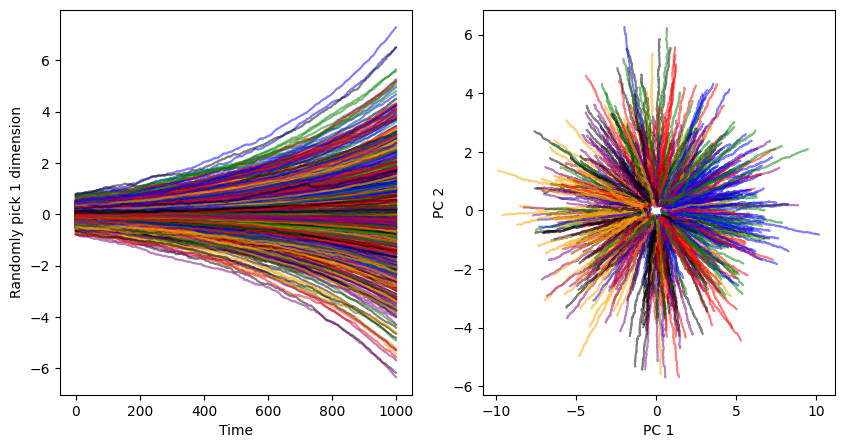

In [39]:
np.random.seed(42)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
def generate_to_plot_Perceptron():
    gen_data = generate_data(c, t, d, to_d, a, theta)

    # random_mat = np.random.rand(10, 10)
    random_mat = np.random.uniform(0, 1, (to_d, to_d))
    # random_mat = np.identity(to_d)
    
    for i in range(gen_data.shape[0]):
        gen_data[i, :, :] = random_mat @ gen_data[i, :, :]


    average = np.zeros((c, to_d))

    color = ['orange', 'black', 'green', 'blue', 'red', 'purple']
    pca = PCA(n_components=5)


    all_data = np.hstack((gen_data[0, :5, :], gen_data[1, :5, :], gen_data[2, :5, :], gen_data[3, :5, :], gen_data[4, :5, :], gen_data[5, :5, :]))
    print(all_data.shape)

    for i in range(c):
        recovered_data = pca.fit_transform(all_data.T).T
        print(recovered_data.shape)
        ax[0].plot(np.arange(1000),gen_data[i, 0, :], color = color[i], alpha = 0.5)
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Randomly pick 1 dimension')

    for i in range(c):
        epoch_data = gen_data.shape[2]

        ax[1].plot(recovered_data[0, i*epoch_data:(i+1)*(epoch_data)], recovered_data[1, i*epoch_data:(i+1)*(epoch_data)], color = color[i], alpha = 0.5)
        ax[1].set_xlabel('PC 1')
        ax[1].set_ylabel('PC 2')

    for i in range(c):
        average[i, :] = np.mean(gen_data[i, :, :], axis = 1)
        
    # print(average.shape)
    pca = PCA(n_components=2)
    recovered_data_1 = pca.fit_transform(average)

    # print(recovered_data_1.shape)


    
    # plt.scatter(average[:, 0], average[:, 1], color = color)

    for i in range((recovered_data_1.shape[0])):
        data_train.append(recovered_data_1[i, :])
        data_test.append(i)


    

for i in range(100):
    generate_to_plot_Perceptron()

plt.show()
 